# **Decision Trees and Random Forest Project: Predicting Potential Customers**

# **Marks: 60**

Welcome to the project on classification using Decision Tree and Random Forest.

--------------------------------
## **Context** 
-------------------------------

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market, would be worth $286.62bn by 2023, with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc., it is now preferable to traditional education. 

The online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as **leads**. There are various sources of obtaining leads for Edtech companies, like:

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure.
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.


----------------------------
## **Objective**
-----------------------------


ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate the resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers. 
* Find the factors driving the lead conversion process.
* Create a profile of the leads which are likely to convert.


--------------------------
## **Data Description**
--------------------------

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.

* **ID:** ID of the lead
* **age:** Age of the lead
* **current_occupation:** Current occupation of the lead. Values include 'Professional', 'Unemployed', and 'Student'
* **first_interaction:** How did the lead first interact with ExtraaLearn? Values include 'Website' and 'Mobile App'
* **profile_completed:** What percentage of the profile has been filled by the lead on the website/mobile app? Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* **website_visits:** The number of times a lead has visited the website
* **time_spent_on_website:** Total time (seconds) spent on the website.
* **page_views_per_visit:** Average number of pages on the website viewed during the visits
* **last_activity:** Last interaction between the lead and ExtraaLearn 
    * **Email Activity:** Seeking details about the program through email, Representative shared information with a lead like a brochure of the program, etc.
    * **Phone Activity:** Had a phone conversation with a representative, had a conversation over SMS with a representative, etc.
    * **Website Activity:** Interacted on live chat with a representative, updated profile on the website, etc.

* **print_media_type1:** Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper
* **print_media_type2:** Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine
* **digital_media:** Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms
* **educational_channels:** Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* **referral:** Flag indicating whether the lead had heard about ExtraaLearn through reference.
* **status:** Flag indicating whether the lead was converted to a paid customer or not. The class 1 represents the paid customer and class 0 represents the unpaid customer.

## **Importing the necessary libraries and overview of the dataset**

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score

from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

### **Loading the dataset**

In [2]:
learn = pd.read_csv("ExtraaLearn.csv")

In [3]:
# Copying data to another variable to avoid any changes to the original data
data = learn.copy()

### **View the first and the last 5 rows of the dataset**

In [4]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [5]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


### **Understand the shape of the dataset**

In [6]:
data.shape

(4612, 15)

* The dataset has **4612 rows and 15 columns.** 

### **Check the data types of the columns in the dataset**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**

* `age`, `website_visits`, `time_spent_on_website`, `page_views_per_visit`, and `status` are of numeric type while rest of the columns are of object type.

* There are **no null values** in the dataset.

In [8]:
# Checking for duplicate values
data.duplicated().sum()

0

- There are **no duplicate values** in the data.

## **Exploratory Data Analysis**

### **Univariate Analysis**

### **Question 1:** Write the code to find the summary statistics and write your observations based on that. (4 Marks)

In [9]:
data.describe().T
# The .describe() method by default includes only all numeric columns

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


**Observations:**
<ul>
  <li><b>The average lead age is around 46 years</b>. The age range is high (18-63), denoting that age is quite diversified across leads. Furthermore, mean is smaller than median, denoting that the age distribution is left-skewed (the long tail of the distribution is on the left side, the younger age).</li>
  <li><b>The average number of website visits is around 4</b>. Moreover, there are some extreme values on the upper side, given the huge difference beween the 3rd quartile (5) and the maximum value (30). The standard deviation of this variable is moderately high.</li>
  <li><b>The average of the total time spent on the website is much larger than the median</b>. This great difference (724-376) tells us that there is a huge imbalance in the variable distribution towards the right side. The differences (max-Q3), (Q3-median) are on the thousands scale, while the (median-Q1), (Q1-min) differences are on the hundreds scale. The standard deviation of this variable is very high, indicating significative variability.</li>
  <li><b>On average, the average number of pages on the website viewed during the visits is 3</b>. However, there are some extreme (high) values, given that the maximum value is around 18.</li>
  <li><b>The status is the binary outcome, encoded as integer</b>. The mean value lower than 0.5 suggests that the number of unpaid customers is larger than that of the paid ones. Namely, this average value indicates that only around 30% of the leads have been converted.</li>
</ul> 

In [10]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing count of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(normalize = True))
    print("-" * 50)

EXT001     0.000217
EXT2884    0.000217
EXT3080    0.000217
EXT3079    0.000217
EXT3078    0.000217
             ...   
EXT1537    0.000217
EXT1536    0.000217
EXT1535    0.000217
EXT1534    0.000217
EXT4612    0.000217
Name: ID, Length: 4612, dtype: float64
--------------------------------------------------
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
--------------------------------------------------
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
--------------------------------------------------
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
--------------------------------------------------
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
--------------------------------------------------
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: 

**Observations:**
* Most of the leads are working professionals.
* As expected, the majority of the leads interacted with ExtraaLearn from the website.
* Almost an equal percentage of profile completions are categorized as high and medium that is 49.1% and 48.6%, respectively. Only **2.3%** of the profile completions are categorized as low.
* Approx 49.4% of the leads had their last activity over email, followed by 26.8% having phone activity. This implies that the majority of the leads prefer to communicate via email.
* We can observe that each ID has an equal percentage of values. Let's check the number of unique values in the ID column.

In [11]:
# Checking the number of unique values
data["ID"].nunique()

4612

* All the values in the ID column are unique.
* We can drop this column as it would not add value to our analysis.

In [12]:
# Dropping ID column
data.drop(["ID"], axis = 1, inplace = True)

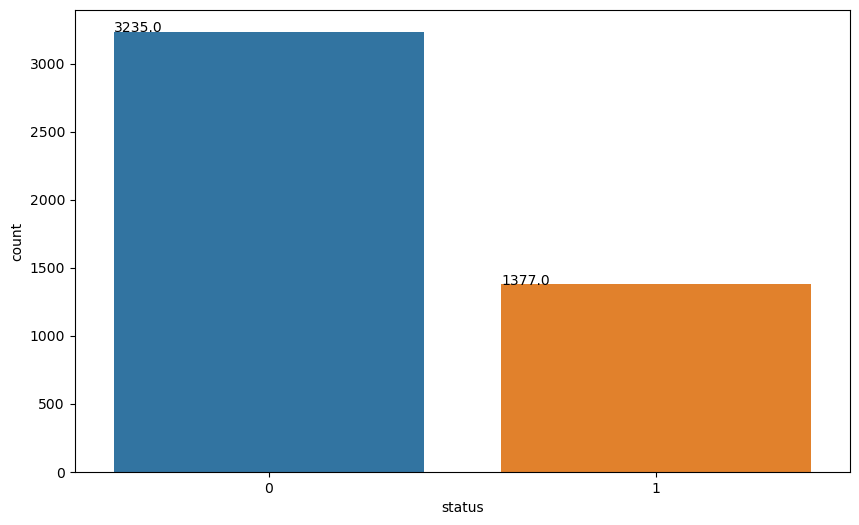

In [13]:
plt.figure(figsize = (10, 6))

ax = sns.countplot(x = 'status', data = data)

# Annotating the exact count on the top of the bar for each category 
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+ 0.35))

- The above plot shows that number of leads converted are significantly less than number of leads not converted which can be expected.
- The plot indicates that **~30%** (1377/4612) of leads have been converted.

**Let's check the distribution and outliers for numerical columns in the data**

### **Question 2: Provide observations for below distribution plots and box plots. (4 Marks)**

age
Skew : -0.72


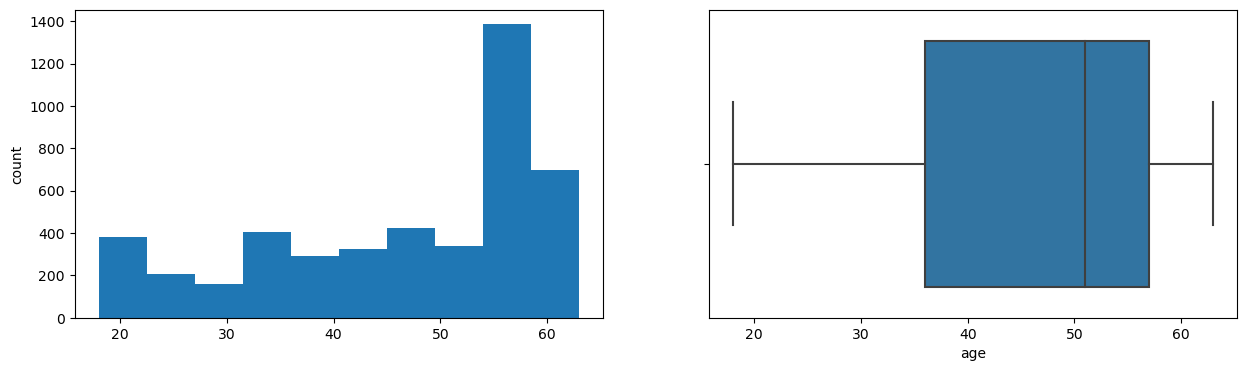

website_visits
Skew : 2.16


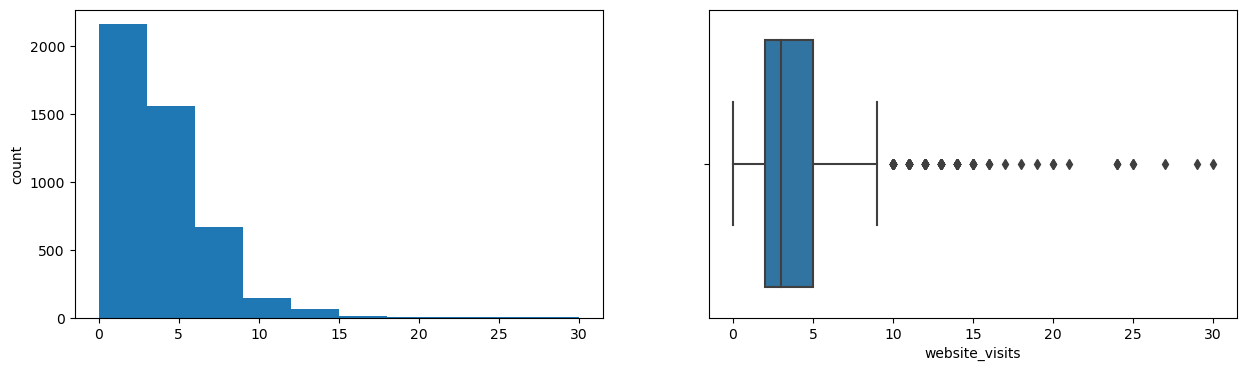

time_spent_on_website
Skew : 0.95


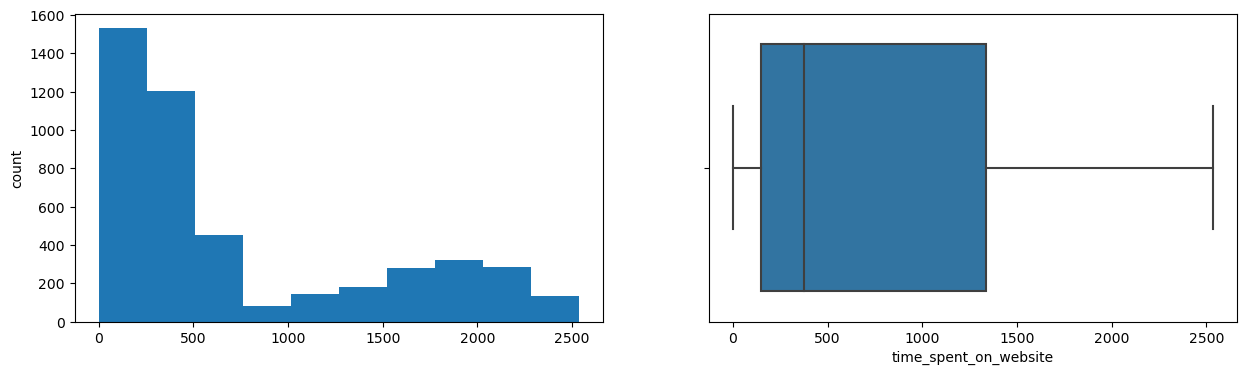

page_views_per_visit
Skew : 1.27


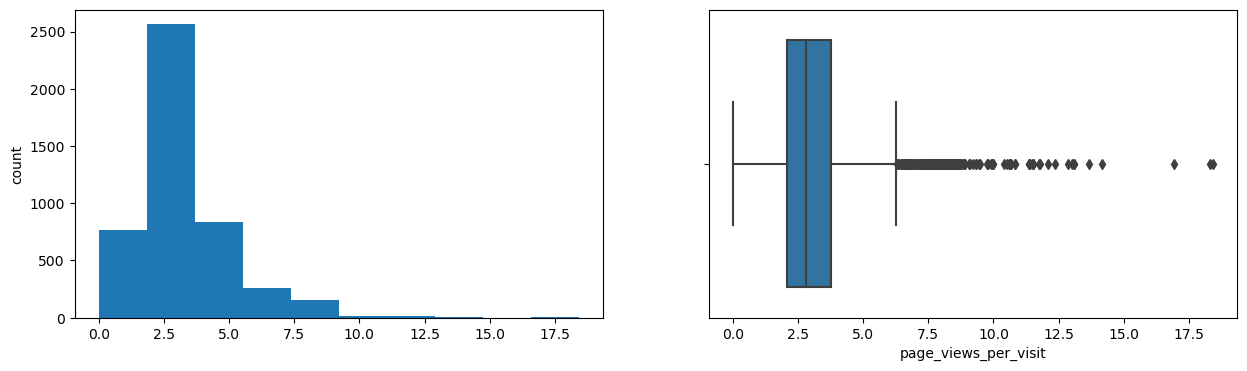

In [14]:
for col in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    print(col)
    
    print('Skew :',round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

**Observations:**
<ul>
  <li>First of all, no feature  is normally distributed. All variables concerned have some degree of skewness.</li>
  <li><b>website_visits </b>and <b>page_views_per_visit</b> are heavily right-skewed. Boxplots of both variables have many outliers towards the right, indicating that most of the leads tend to visit the website fewer times and view a smaller number of pages.</li>  
  <li><b>age</b> is slightly left-skewed. No outlier appears on its boxbplot.</li>
  <li><b>time_spent_on_website</b> is slightly right-skewed. No outlier appears on its boxplot, as well.</li>
</ul>

### **Bivariate Analysis**

**We are done with univariate analysis and data preprocessing. Let's explore the data a bit more with bivariate analysis.**

Leads will have different expectations from the outcome of the course and their current occupation may play a key role for them to take the program. Let's analyze it.

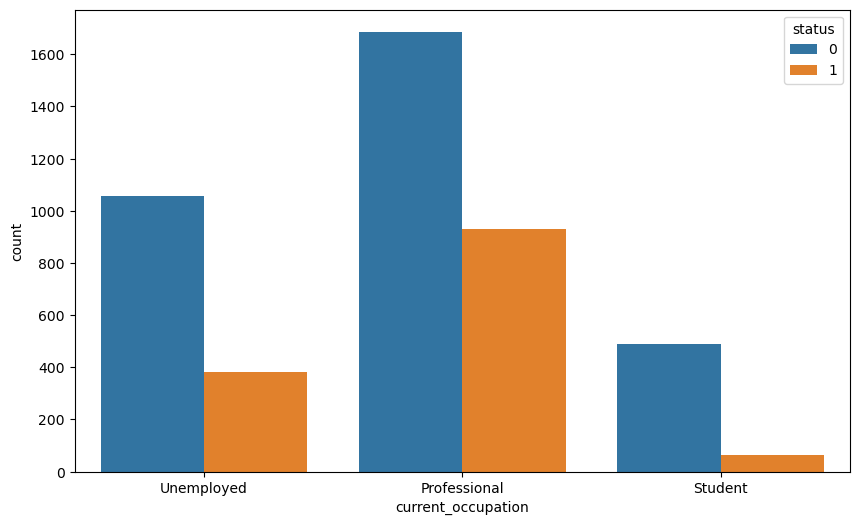

In [15]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'current_occupation', hue = 'status', data = data)

plt.show()

**Observations:**

- The plot shows that working professional leads are more likely to opt for a course offered by the organization and the students are least likely to be converted. 
- This shows that the currently offered programs are more oriented toward working professionals or unemployed personnel. The programs might be suitable for the working professionals who might want to transition to a new role or take up more responsibility in their current role. And also focused on skills that are in high demand making it more suitable for working professionals or currently unemployed leads.

**Age can also be a good factor to differentiate between such leads. Let's explore this.**

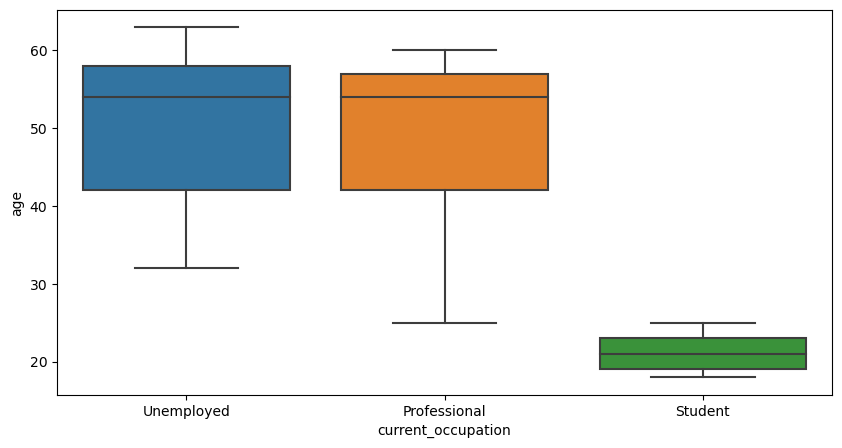

In [16]:
plt.figure(figsize = (10, 5))

sns.boxplot(data["current_occupation"], data["age"])

plt.show()

In [17]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


**Observations:**

* The range of age for students is 18 to 25 years.
* The range of age for professionals is 25 to 60 years.
* The range of age for unemployed leads is 32 to 63 years.
* The average age of working professionals and unemployed leads is almost 50 years.

**The company's first interaction with leads should be compelling and persuasive. Let's see if the channels of the first interaction have an impact on the conversion of leads.**

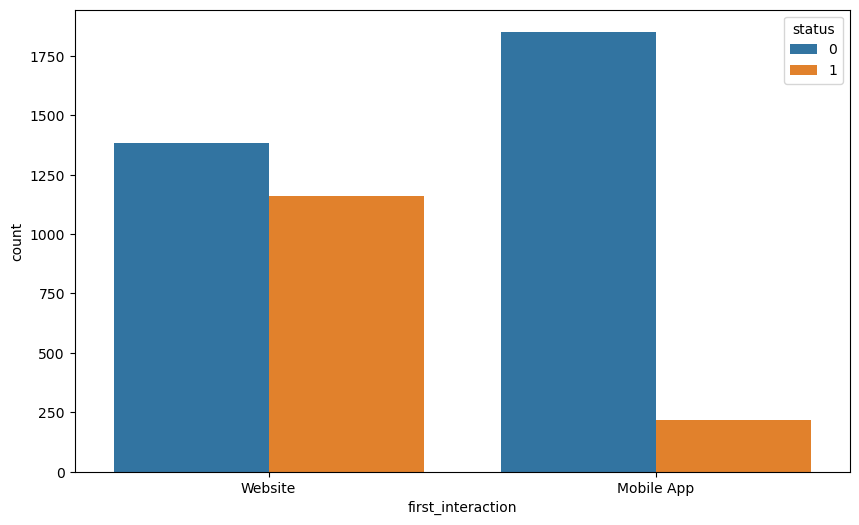

In [18]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'first_interaction', hue = 'status', data = data)

plt.show()

**Observations:**

* The website seems to be doing a good job as compared to mobile app as there is a huge difference in the number of conversions of the leads who first interacted with the company through website and those who interacted through mobile application.
* Majority of the leads who interacted through website were converted to paid customers, while only a small number of leads who interacted through mobile app converted.

**We observed earlier that some leads spend more time on websites than others. Let's analyze if spending more time on websites results in conversion.**

### **Question 3:** 
- **Create a boxplot for variables 'status' and 'time_spent_on_website' (use sns.boxplot() function) (1 Mark)**
- **Provide your observations from the plot (2 Marks)**

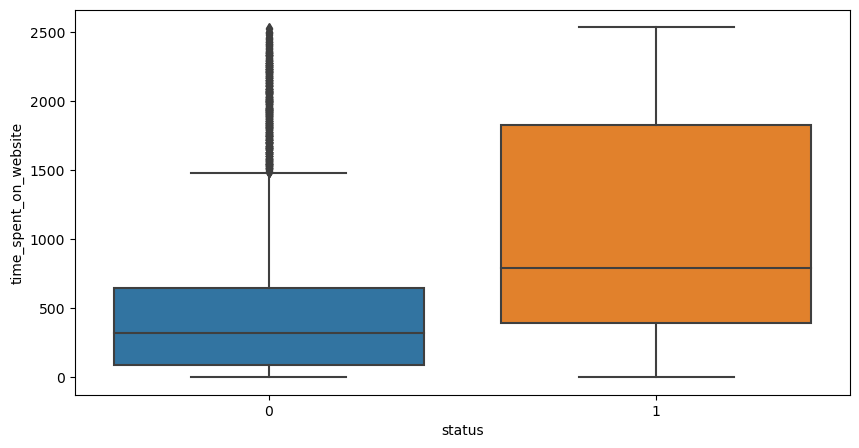

In [19]:
plt.figure(figsize = (10, 5))

sns.boxplot(data["status"], data["time_spent_on_website"]) # Write your code here

plt.show()

**Observations:**
<ul>
 <li>The majority of the leads which were not converted tends to spend lesser time on the website compared to those who converted. This may be associated to the fact that those who are more motivated/interested tend to delve deeper into all details of the proposal, which requires time.</li>
 <li>The interquartile range for the 0 status is narrower than that for the 1 status. It's likely that people who are less interested tend to behave in a similar way (i.e., open the website, quickly scroll it and close it), while those who are more interested have different behaviors about their permanence on the website.</li> 
 <li>Among those who did not convert, there are many outliers towards the upper side of time_spent_on_website variable. It seems reasonable that this portion represents those who were originally interested in upskilling, but then gave up the ExtraaLearn proposal (i.e, due to high costs, schift towards a different provider/platform, personal choices,...).</li>
 <li>In conclusion, the time spent on website can be useful since on average those who converted tend to spend more time on the website due to plausible association with interest/motivation. However, due to the high number of outliers on the high tail for the 0 status, thinking that all people who spend a lot of time on the platform are likely to convert can be deceiving.</li>
</ul>

**People browsing the website or the mobile app are generally required to create a profile by sharing their details before they can access more information. Let's see if the profile completion level has an impact on lead conversion**

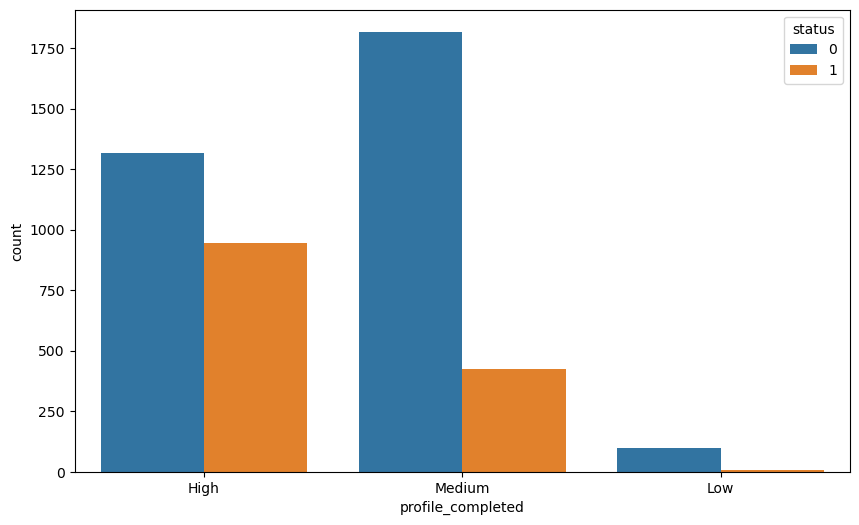

In [20]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'profile_completed', hue = 'status', data = data)

plt.show()

**Observations:**

* The leads whose profile completion level is high converted more in comparison to other levels of profile completion.
* The medium and low levels of profile completion saw comparatively very less conversions.
* The high level of profile completion might indicate a lead's intent to pursue the course which results in high conversion.

**Referrals from a converted lead can be a good source of income with a very low cost of advertisement. Let's see how referrals impact lead conversion status.**

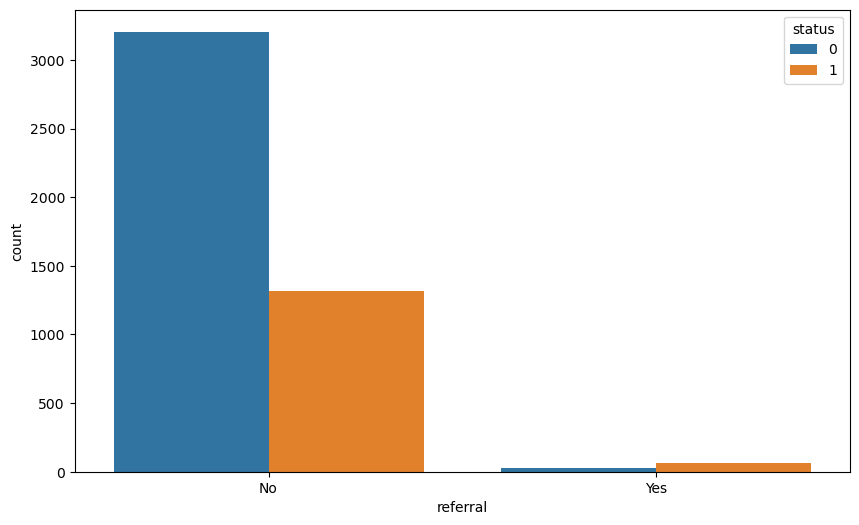

In [21]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'referral', hue = 'status', data = data)

plt.show()

**Observations:**
* There are a very less number of referrals but the conversion is high. 
* Company should try to get more leads through referrals by promoting rewards for existing customer base when they refer someone.

### **Question 4:** Write the code to plot the correlation heatmap and write your observations based on that. (4 Marks)

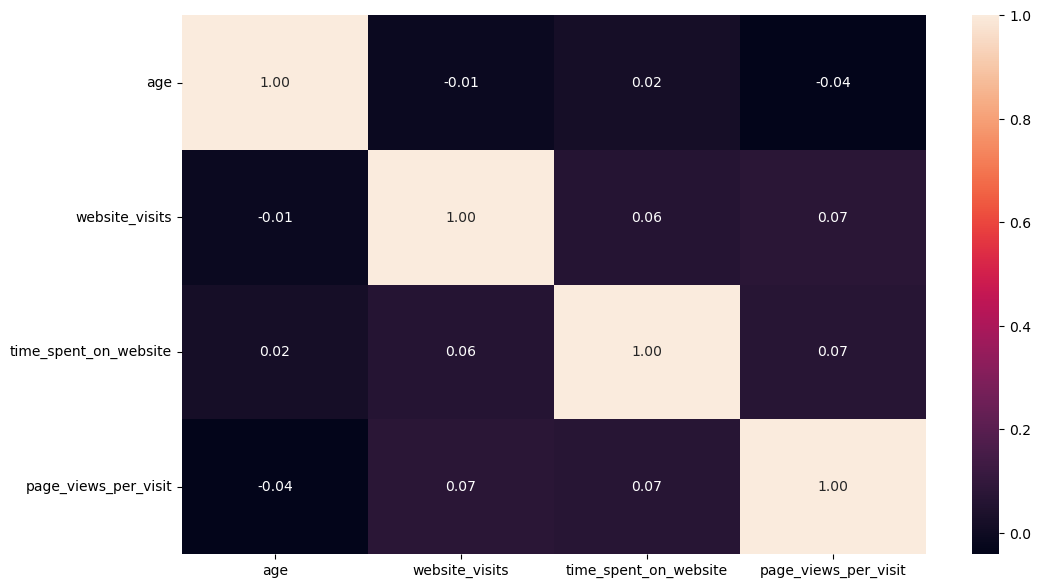

In [22]:
plt.figure(figsize = (12, 7))

sns.heatmap(data[["age","website_visits","time_spent_on_website","page_views_per_visit"]].corr(), annot = True, fmt = '.2f')
 
plt.show()

**Observations:**
<ul>
 <li>There is no significant correlation among features.</li>
    <li>Even if <b>status</b> is a numeric column, it was intentionally removed from the plot, being a binary variable encoding categories.</li>
</ul>

## **Data preparation for modeling**

- We want to predict which lead is more likely to be converted.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test sets to be able to evaluate the model that we build on the train data.

In [23]:
# Separating the target variable and other variables
X = data.drop(columns = 'status')

Y = data['status']

In [24]:
# Creating dummy variables, drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first = True)

In [25]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

**Checking the shape of the train and test data**

In [26]:
print("Shape of the training set: ", X_train.shape)   

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (3228, 16)
Shape of the test set:  (1384, 16)
Percentage of classes in the training set:
0    0.704151
1    0.295849
Name: status, dtype: float64
Percentage of classes in the test set:
0    0.695087
1    0.304913
Name: status, dtype: float64


## **Building Classification Models**

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem at hand.**

### **Model evaluation criterion**

**Model can make wrong predictions as:**

1. Predicting a lead will not be converted to a paid customer but, in reality, the lead would have converted to a paid customer.
2. Predicting a lead will be converted to a paid customer but, in reality, the lead would have not converted to a paid customer. 

### **Which case is more important?** 

* If we predict that a lead will not get converted and the lead would have converted then the company will lose a potential customer. 

* If we predict that a lead will get converted and the lead doesn't get converted the company might lose resources by nurturing false-positive cases.

Losing a potential customer is a greater loss for the organization.

### **How to reduce the losses?**

* Company would want `Recall` to be maximized. The greater the Recall score, higher the chances of minimizing False Negatives. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [27]:
# Function to print the classification report and get confusion matrix in a proper format
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

### **Decision Tree**

### **Question 5:**

- **Fit the decision tree classifier on the training data (use random_state=7) (2 Marks)**
- **Check the performance on both training and testing datasets (use metrics_score function) (2 Marks)**
- **Write your observations (3 Marks)**

In [28]:
# Fitting the decision tree classifier on the training data
# setting class weights by inverting the proportions of data in each class of the original data, to deal with imbalance.  
d_tree = DecisionTreeClassifier(class_weight={0:y_train.value_counts(normalize=1)[1],1:y_train.value_counts(normalize=1)[0]},random_state=7)

d_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.2958488228004957,
                                     1: 0.7041511771995044},
                       random_state=7)

**Let's check the performance on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



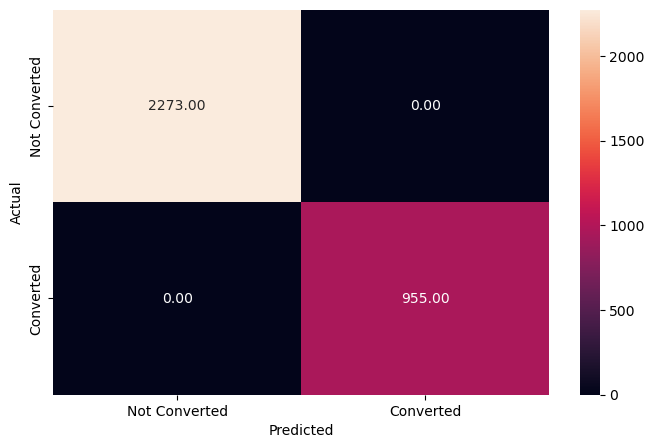

In [29]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train,y_pred_train1)

**Observations:**
<br>The performance of the Decision Tree is perfect on the training set, for all metrics.
This outcome is not surprising, since this model without any restriction most of the times tend to overfit the training data.


**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       962
           1       0.67      0.70      0.69       422

    accuracy                           0.80      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.81      0.80      0.81      1384



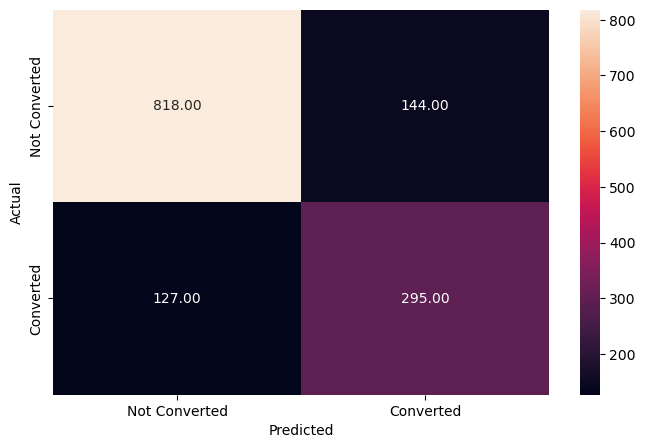

In [30]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test,y_pred_test1)

**Observations:**
<ul>
 <li>The Decision Tree worked very well on the training data, but not so well on the test data. The recall here is 0.7, compared to 1 in the training set.</li>
 <li>The recall is not maximized. It means that the model has a 30% chance (1-0.7) of predicting that a person will not convert even though he/she would, implying that <b>the company will lose some potential customers</b>.</li> 
 <li>The precision suggests that the chance of predicting that a person will convert even though he/she would not is 33% (1-0.67), implying that <b>the company may waste time, money and energies by focusing on leads that are unlikely to become paid customers</b>.</li>
</ul>

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** to reduce overfitting of the model. We can tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is approximately the opposite of the imbalance in the original data. 

**This would tell the model that 1 is the important class here.**

In [31]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

### **Question 6:**
- **Check the performance on both training and testing datasets (4 Marks)**
- **Compare the results with the results from the decision tree model with default parameters and write your observations (4 Marks)**

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



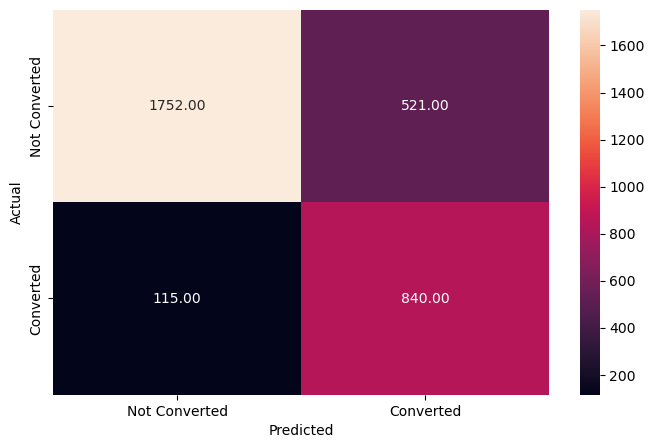

In [32]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train,y_pred_train2)

**Observations:**
<br>Compared to the Decision Tree with default hyperparameters, <b>the performance on the training data dropped down a lot</b>.
This is consistent with our aim, reducing overfitting.</br>

**Let's check the model performance on the testing data**

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



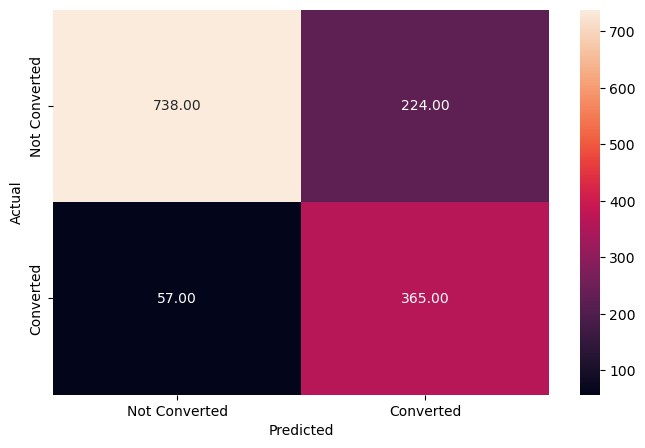

In [33]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test,y_pred_test2)

**Observations:**
<ul>
 <li>The tuned model is not overfitting the traning data since it performs almost equally on training and test sets.</li>
 <li>Compared to the previous model, the precision is slightly lower. However, the recall is significantly higher. This means that we pay an higher capability of capturing most of the potential customers with some loss of resources (due to some extra false-positives captured).</li>
 <li>The increase in recall is much higher compared to the loss in precision. In accordance with our main aim (maximizing recall), this optimized model performs better than the previous one. </li>
</ul>

**Let's visualize the tuned decision tree** and observe the decision rules:

### **Question 7: Write your observations from the below visualization of the tuned decision tree. (5 Marks)**

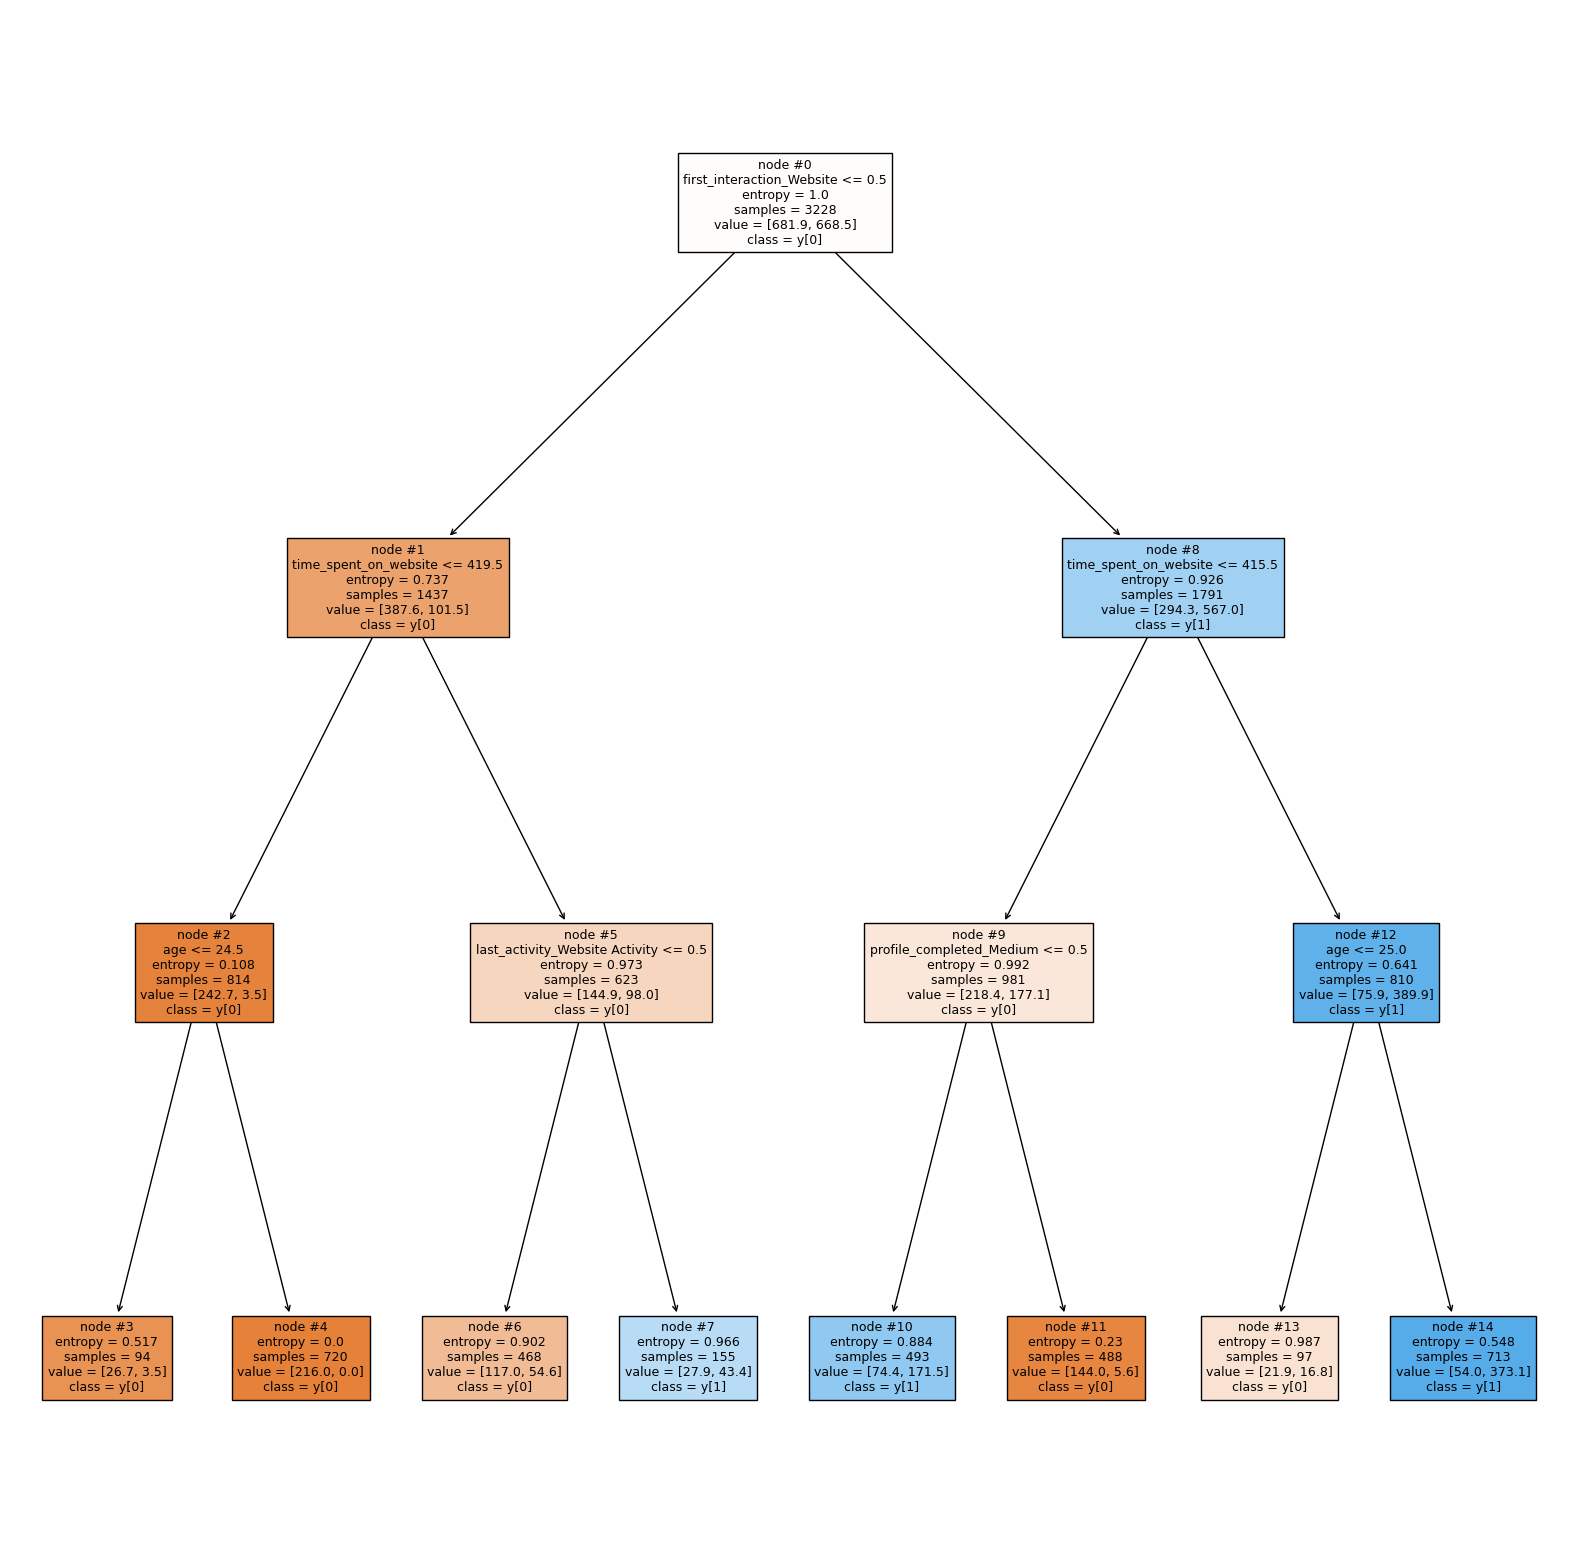

In [34]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

**Note:** Blue leaves represent the converted leads, i.e., **y[1]**, while the orange leaves represent the not converted leads, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations:**
<ul>
 <li>In the segment of the leads that first interacted through Website:</li>
    <ul><li>those who spent a lot of time searching on the website have a good chance to convert, as in this case the amount of time is a useful indicator of their intent. </li>
    <li>those who did not spend a lot of time on the website and with a medium profile completion percentage are likely to not convert. It is plausible that a not fully completed profile is a mark of lack of full interest.</li>
   </ul>
  <li>In the segment of the leads that first interacted through Mobile App:</li>
    <ul><li>those who did not spend a lot of time searching on the website have with an high confidence an high chance to not convert. Also this path fosters the belief of the relevant association between total time spent on the website and lead conversion. </li>
    <li>those who spent more time on the website are likely to not convert, but with a small confidence. As discussed in Question 3, it is possible that in this case outliers on the upper side of the feature concerned - appearing while observing those who did not convert - do not allow to extract clean structures from the data. Even by proceeding with the leaf nodes by splitting using last_activity_Website Activity, the confidence of the predictions is not high.</li>
    </ul>
</ul>

**Let's look at the feature importance** of the tuned decision tree model

In [35]:
# Importance of features in the tree building
print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
time_spent_on_website           0.348142
first_interaction_Website       0.327181
profile_completed_Medium        0.239274
age                             0.063893
last_activity_Website Activity  0.021511
website_visits                  0.000000
page_views_per_visit            0.000000
current_occupation_Student      0.000000
current_occupation_Unemployed   0.000000
profile_completed_Low           0.000000
last_activity_Phone Activity    0.000000
print_media_type1_Yes           0.000000
print_media_type2_Yes           0.000000
digital_media_Yes               0.000000
educational_channels_Yes        0.000000
referral_Yes                    0.000000


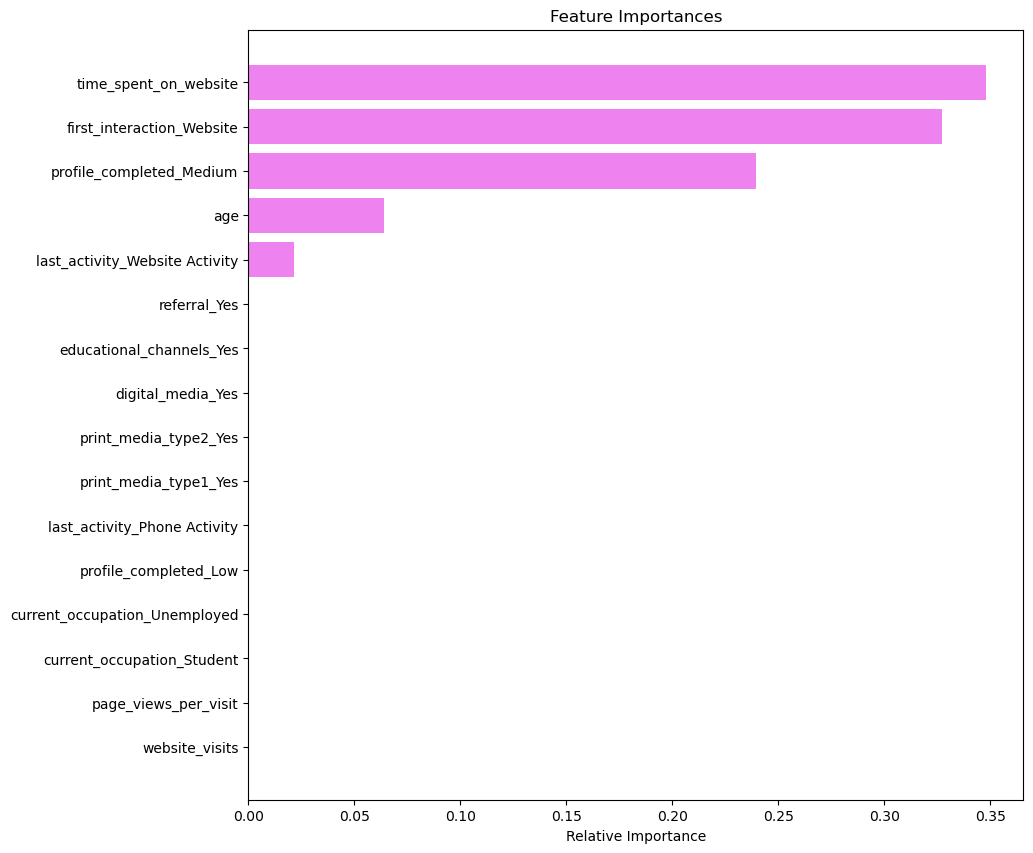

In [36]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- **Time spent on the website and first_interaction_website are the most important features** **followed by profile_completed, age, and last_activity**.
- **The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not**.

Now, let's build another model - **a random forest classifier.**

### **Random Forest Classifier**

### **Question 8:** 
- **Fit the random forest classifier on the training data (use random_state = 7) (2 Marks)**
- **Check the performance on both training and testing data (use metrics_score function) (2 Marks)**
- **Write your observations (3 Marks)**

In [37]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(class_weight={0:y_train.value_counts(normalize=1)[1],1:y_train.value_counts(normalize=1)[0]},random_state=7)

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.2958488228004957,
                                     1: 0.7041511771995044},
                       random_state=7)

**Let's check the performance of the model on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



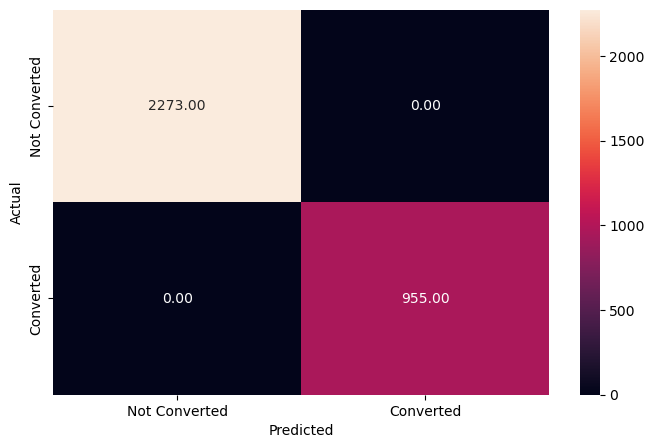

In [38]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train,y_pred_train3)

**Observations:**
<br>The performance score is 100% for all metrics. The Random Forest performed perfectly on the training data.</br>

**Let's check the performance on the testing data**

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       962
           1       0.80      0.68      0.74       422

    accuracy                           0.85      1384
   macro avg       0.84      0.80      0.82      1384
weighted avg       0.85      0.85      0.85      1384



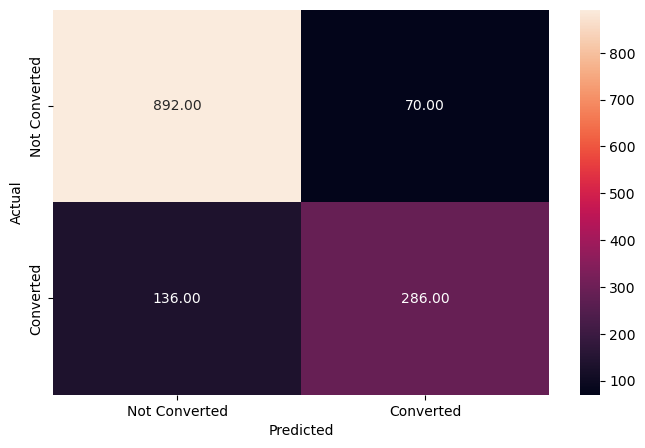

In [39]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test,y_pred_test3)

**Observations:**
<ul>
 <li>The performance on all metrics calculated on the test set is worse than that on the training set, with a particular decay in the recall score.</li> 
 <li>The model just memorized the training data without learning any general pattern useful for out-of-sample predictions. This is an example of overfitting.</li>
</ul>

**Let's see if we can get a better model by tuning the random forest classifier**

### **Random Forest Classifier - Hyperparameter Tuning**

Let's try **tuning some of the important hyperparameters of the Random Forest Classifier**. 

We will **not** tune the `criterion` hyperparameter as we know from hyperparameter tuning for decision trees that `entropy` is a better splitting criterion for this data.

In [40]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [41]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features=0.8,
                       n_estimators=110, random_state=7)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2273
           1       0.80      0.78      0.79       955

    accuracy                           0.88      3228
   macro avg       0.86      0.85      0.85      3228
weighted avg       0.88      0.88      0.88      3228



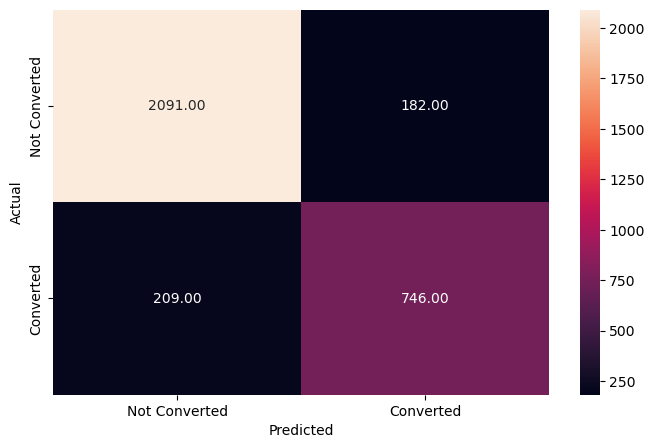

In [42]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train4)

**Observations:**
- We can see that after hyperparameter tuning, the model is performing poorly on the train data as well.
- We can try adding some other hyperparameters and/or changing values of some hyperparameters to tune the model and see if we can get better performance.

**Note:** **GridSearchCV can take a long time to run** depending on the number of hyperparameters and the number of values tried for each hyperparameter. **Therefore, we have reduced the number of values passed to each hyperparameter.** 

### **Question 9:**
- **Tune the random forest classifier using GridSearchCV (4 Marks)**
- **Check the performance on both training and testing datasets (2 Marks)**
- **Compare the results with the results from the random forest model with default parameters and write your observations (2 Marks)**

**Note:** The below code might take some time to run depending on your system's configuration.

In [43]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned,parameters,scoring=scorer,cv=5)

grid_obj = grid_obj.fit(X_train,y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

**Let's check the performance of the tuned model**

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



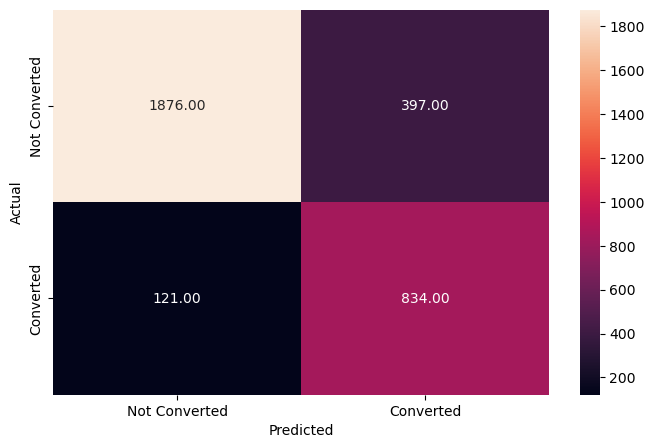

In [44]:
# Checking performance on the training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train,y_pred_train5)

**Observations:**
<br>The performance of the tuned Random Forest on the training set is worse than that of the unconstrained model on the same dataset. As expeccted, the constrained model is fitting training data less closely.</br>

**Let's check the model performance on the test data**

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



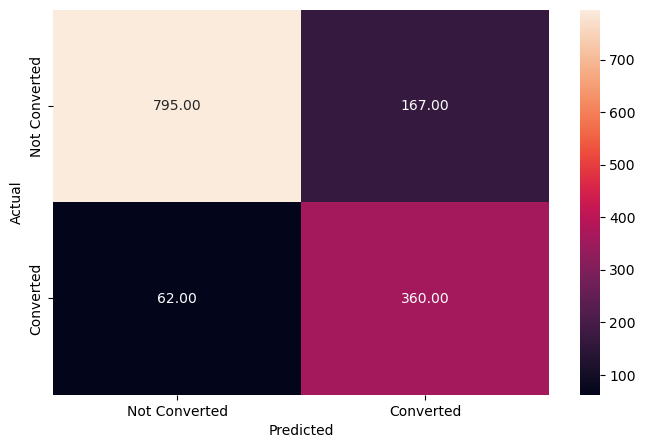

In [45]:
# Checking performance on the test data
y_pred_test5 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test,y_pred_test5)

**Observations:**
<ul>
 <li>The performance achieved on the test set is similar to that obtained on the training set. The tuned Random Forest model is not overfitting the training data.</li>
 <li>The two candidates models are tuned Decision Tree and tuned Random Forest. Both give reasonably good predictions, but at a pretty comparable recall score (85%-86%) the tuned Random Forest is able to provide improvements in the precision score (68%-62%) than the tuned Decision Tree.</li>
 <li>The tuned Random Forest model, compared to the tuned Decision Tree model, is almost equally likely to capture potential customers, but at a lower risk of losing resources on the company side. Therofore, the model of choice is the tuned Random Forest.</li>
</ul>

**One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importance of the model.**

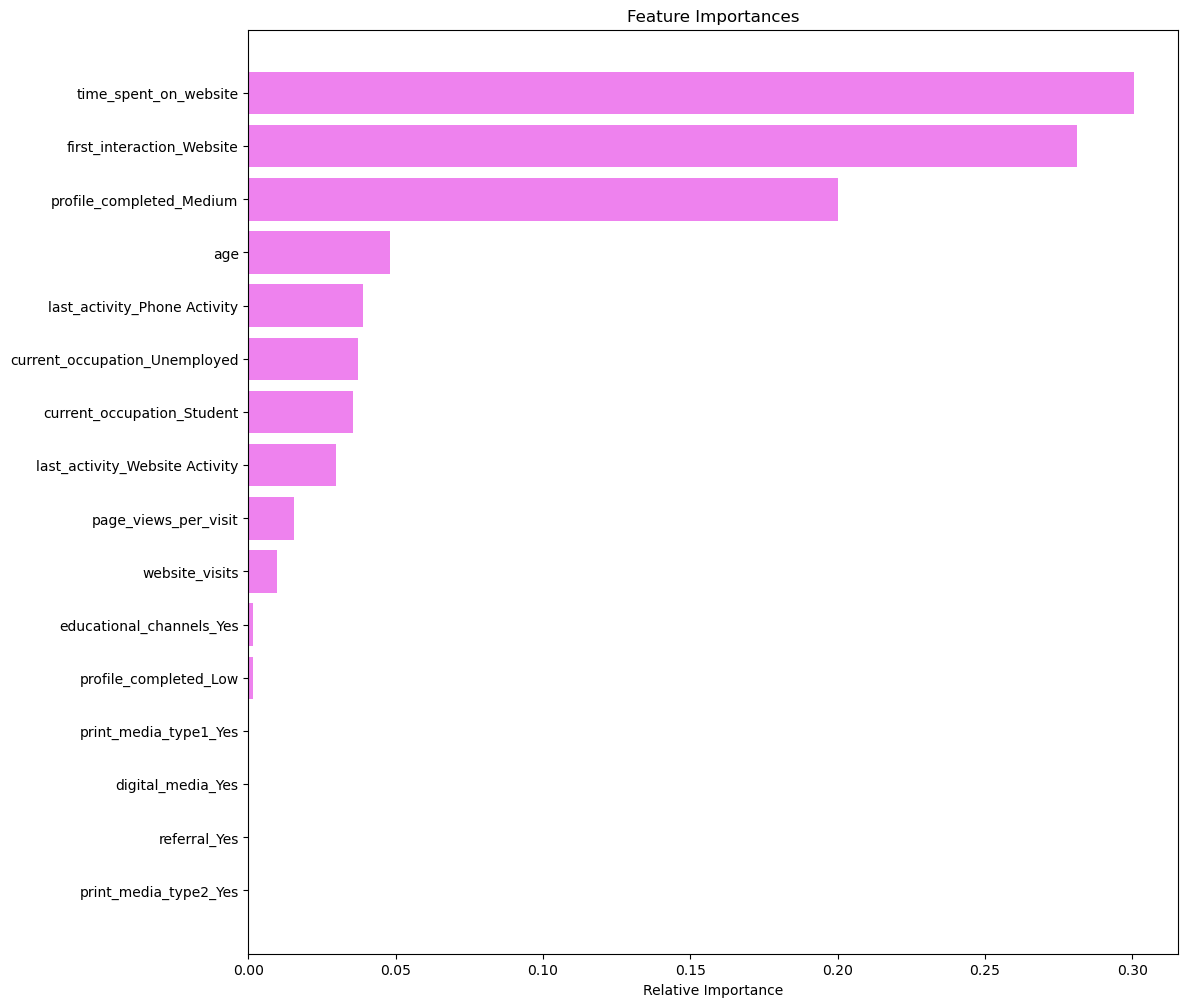

In [46]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- Similar to the decision tree model, **time spent on website**, **first_interaction_website**, **profile_completed** and **age** are the top four features that help distinguish between not converted and converted leads.
- Unlike the decision tree, the random forest gives some importance to other variables like **occupation**, **page_views_per_visit**, as well. This implies that the random forest is giving importance to more factors in comparison to the decision tree.

## **Conclusion and Recommendations**

### **Question 10:**

**Write your conclusions on the key factors that drive the conversion of leads and write your recommendations to the business on how can they improve the conversion rate. (10 Marks)**

### **Conclusions:**
<ul>
 <li>The best model is the tuned Random Forest, which is giving 85% recall score (and 68% precision) on unseen data.</li>
 <li>The company should use the mentioned model to predict the leads which are going to convert to paid customers and behave accordingly.</li>
    <li>Most important features seem to be <b>time spent on website</b>,<b> first interaction</b>,<b> profile completion percentage</b> and <b>age</b>, followed by <b>occupation</b>, <b>last activity</b> and <b>pages viewed during the visits</b>.</b></li>
</ul>

### **Business Recommendations**
<ul>
 <li>The total time spent on the website is the main driver for the lead conversion. A lot of time spent on the website is a good indicator of the intent of the leads, however as already discussed this variable is noisy while isolating by status 0; in such cases other factors may be needed in order to take the appropriate decision.</li>
 <li>The website seems to be doing a crucial job in converting the leads. The company should focus on the improvement of the website as a main strategy (i.e, pleasant interface, detailed support and manteined website) in order to promote longer permanence and ease of browsing.</li>
 <li>The profile completion is a key driver for the conversion, as well. The company should make the compilation process easy and intuitive, and ensure that some reminders are sent to those who have not completed the task yet.</li>
 <li>The age of the leads is a quite important factor. Since working professionals and unemployed personnel are the two categories with higher chance to opt for a course offered by the organization, and the students are least likely to be converted, the company should take into account that marketing and advertisement strategies should involve mainly people over 30. The program offer should be structured accordingly.</li>
 <li>Current occupation is a useful indicator as well, and relevant notes are aligned to those just proposed for age.</li>
 <li>Since the decision rule is taking into account the last activity via phone and website, the company should guarantee the real time availability of qualified personnel to support the leads through these channels.</li>
 <li>Also the average number of pages on the website viewed during the visits and the number of times a lead has visited the website play a role in the decision making, thus strengthening even more the importance of keeping the website adequated to high standards.</li>
</ul>